In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import glob
import os
if os.name == 'nt':
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"
    
# -값이 깨지는 문제 해결을 위해 파라미터값 설정    
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

In [2]:
os.listdir('../data/관광/')

['방한외래관광객,국민해외관광객,관광수입(1975-2021).xlsx',
 '방한외래관광객,국민해외관광객,관광수입(2010-2021)_수정.xlsx',
 '주요관광지점+입장객(4대궁+및+종묘)_2011_2021.xlsx',
 '주요관광지점+입장객(박물관+및+전시관+등)_2013_2021.xlsx',
 '한국여행중+서울지역+방문지(거주국별)_2012_2020.xlsx',
 '한국여행중+서울지역+방문지(성별_연령별_방문목적_방문횟수)_2012_2020.xlsx',
 '한국여행중+서울지역+방문지(월별)_2012_2019.xlsx',
 '해외여행경험및횟수_시도__2011_2021.xlsx']

# 관광

## 해외여행 중 서울지역 방문지 (거주국별)

In [3]:
path = '../data/관광/'

In [4]:
file = pd.read_excel(path+'한국여행중+서울지역+방문지(거주국별)_2012_2020.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [5]:
file.head()
# 2019년까지 서울 내 방문지 보기 카드로 상세 방문지까지 작성
# 20년도는 시도별 방문만 조사. 서울시에 방문한 비율
# 따라서 소계만 확인해봄

,국가별(1),2012,2012.1,2012.2,2012.3,2012.4,2012.5,2012.6,2012.7,2012.8,...,2019.3,2019.4,2019.5,2019.6,2019.7,2019.8,2019.9,2019.10,2019.11,2020
0,국가별(1),한국여행중 서울방문,서울 내 방문지,서울 내 방문지,서울 내 방문지,서울 내 방문지,서울 내 방문지,서울 내 방문지,서울 내 방문지,서울 내 방문지,...,서울 내 방문지,서울 내 방문지,서울 내 방문지,서울 내 방문지,서울 내 방문지,서울 내 방문지,서울 내 방문지,서울 내 방문지,서울 내 방문지,한국여행중 서울방문
1,국가별(1),소계,명동,동대문 패션타운,남대문시장,신촌/홍대주변,이태원,잠실(롯데월드),고궁,남산/N서울타워,...,종로/청계,신촌/홍대주변,강남역,이태원,잠실(롯데월드),코엑스,시청/광화문광장,한강/유람선,가로수길,소계
2,전체,82.5,74.5,59.4,38.5,20.0,21.4,28.2,39.1,35.0,...,39.6,39.1,28.2,22.0,23.4,13.9,15.3,12.6,9.2,47.2
3,일본,73.7,84.3,46.4,41.8,15.5,9.7,13.3,22.3,18.7,...,26.1,44.2,28.0,20.2,9.5,12.9,7.6,3.6,16.5,32.8
4,중국,86.2,82.4,75.6,32.8,21.3,15.2,44.0,36.9,42.2,...,26.8,30.0,15.7,12.9,23.1,4.7,19.7,12.4,9.5,48.9


In [6]:
total_col = [col for col in file.columns if file.loc[1, col] == '소계']

In [7]:
total_col

['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

In [8]:
foreigner_visitors = file.loc[:, ['국가별(1)']+total_col]
foreigner_visitors.drop([0,1], axis = 0, inplace = True)

In [9]:
foreigner_visitors = foreigner_visitors.replace({'-' : np.nan})

In [10]:
foreigner_visitors

,국가별(1),2012,2013,2014,2015,2016,2017,2018,2019,2020
2,전체,82.5,80.9,80.4,78.7,78.0,78.8,79.4,76.4,47.2
3,일본,73.7,75.0,70.9,68.0,71.0,74.1,73.0,72.7,32.8
4,중국,86.2,79.3,77.8,76.2,73.8,74.0,79.1,74.7,48.9
5,홍콩,94.6,96.7,97.9,89.6,89.4,87.5,85.1,83.5,NaN
6,싱가포르,92.1,93.2,95.1,91.7,95.9,93.4,91.0,94.1,66.7
7,대만,94.4,94.9,95.7,86.3,84.0,79.7,75.3,67.9,75.0
8,태국,97.9,97.5,98.7,88.1,87.5,90.4,84.5,75.5,NaN
9,말레이시아,97.1,96.2,96.5,88.5,87.5,91.1,79.3,74.6,83.3
10,호주,85.4,82.7,82.9,82.3,87.5,87.1,87.5,84.5,50.0
11,미국,86.0,82.2,82.8,85.3,86.1,85.2,83.5,83.4,53.6


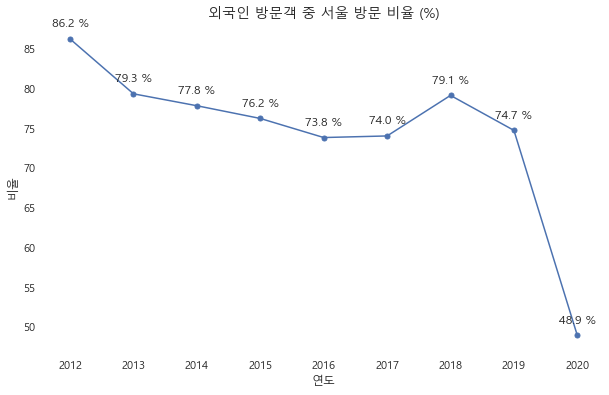

In [20]:
# 전체 외국인 방문객의 서울 방문비율
fig, ax = plt.subplots(figsize = (10,6))
ax.set_facecolor('white')

ax = plt.plot(foreigner_visitors.columns[1:], foreigner_visitors.iloc[2, 1:], marker = 'o', markersize = 5, linewidth = 1.5)

for i, v in enumerate(foreigner_visitors.iloc[2, 1:]):
    plt.text(i,v+1.5,str(v)+' %', ha = 'center')

plt.xlabel('연도')
plt.ylabel('비율')
plt.title('외국인 방문객 중 서울 방문 비율 (%)', fontsize = 14)
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


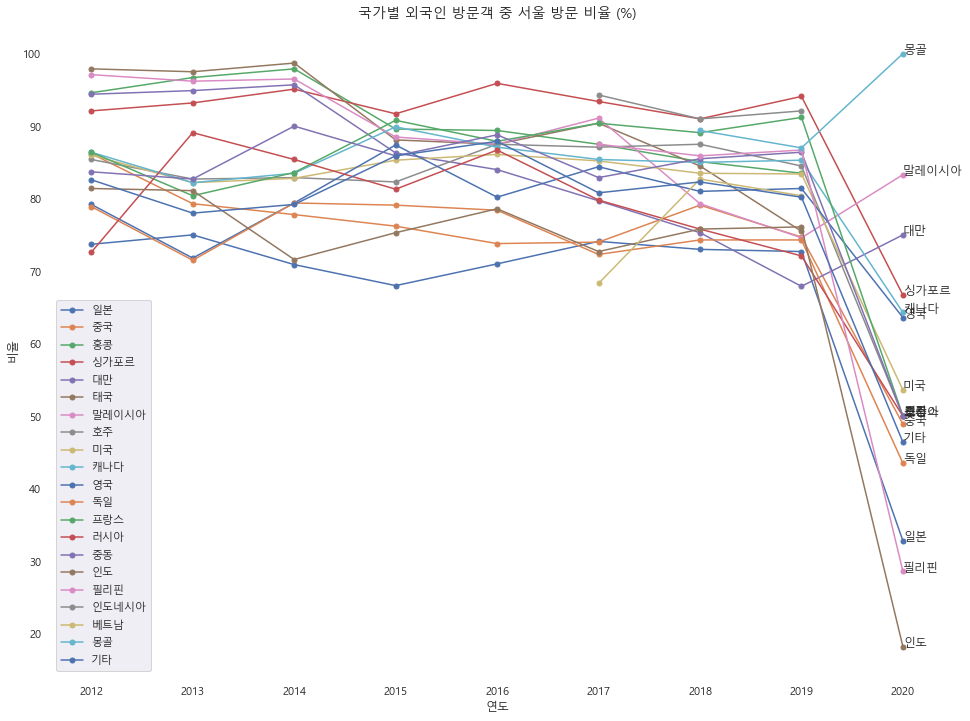

In [19]:
# 국가별 외국인방문객의 서울 방문비율
# 코로나 이슈가 있어서 시계열로 보는 것이 맞는 것 같으나, 국가 항목이 많아서 그래프 고민중
fig, ax = plt.subplots(figsize = (16, 12))

ax.set_facecolor('white')

country = list(foreigner_visitors.loc[3 :,'국가별(1)'])
for i, c in enumerate(country):
    ax = plt.plot(foreigner_visitors.columns[1:], foreigner_visitors.loc[3+i, '2012':], marker = 'o', markersize = 5, linewidth = 1.5, label = c)
    for i, v in enumerate(foreigner_visitors.loc[3+i, '2012':]):
        if i == 8:
            plt.text(i, v, c, ha='left')

plt.legend()
plt.xlabel('연도')
plt.ylabel('비율')
plt.title('국가별 외국인 방문객 중 서울 방문 비율 (%)', fontsize = 14)
plt.show()

## 한국여행중 서울지역 방문지

In [13]:
file = pd.read_excel(path + '한국여행중+서울지역+방문지(월별)_2012_2019.xlsx')
# 서울특별시, 외래관광객조사

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [14]:
file
# 중복응답

,구분별(1),구분별(2),2012,2013,2014,2015,2016,2017,2018,2019
0,한국여행중 서울방문,소계,82.5,80.9,80.4,78.7,78.0,78.8,79.4,76.4
1,서울 내 방문지,명동,74.5,72.8,77.6,77.1,81.1,78.4,-,-
2,서울 내 방문지,남대문시장,38.5,32.8,27.8,29.0,29.0,31.4,-,-
3,서울 내 방문지,명동/남대문/북창,-,-,-,-,-,-,88.2,88.2
4,서울 내 방문지,동대문 패션타운,59.4,56.6,61.9,60.3,62.3,56.8,61.0,58.4
5,서울 내 방문지,종로/청계,-,-,-,-,-,-,37.6,39.6
6,서울 내 방문지,신촌/홍대주변,20.0,24.2,29.9,29.1,33.2,31.2,35.6,39.1
7,서울 내 방문지,강남역,-,-,22.9,23.1,27.1,28.3,27.8,28.2
8,서울 내 방문지,이태원,21.4,21.6,-,-,-,22.5,23.8,22.0
9,서울 내 방문지,잠실(롯데월드),28.2,30.0,23.6,23.4,23.9,-,22.4,23.4


## 한국여행중+서울지역+방문지(성별_연령별_방문목적_방문횟수)_2012_2020.xlsx

In [21]:
file = pd.read_excel(path + '한국여행중+서울지역+방문지(성별_연령별_방문목적_방문횟수)_2012_2020.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [22]:
file = file.replace({'-' : np.nan})
file

,구분별(1),구분별(2),분류별(1),분류별(2),2012,2013,2014,2015,2016,2017,2018,2019,2020
0,전체,소계,한국여행중 서울방문,소계,82.5,80.9,80.4,78.7,78.0,78.8,79.4,76.4,47.2
1,전체,소계,서울 내 방문지,명동/남대문/북창,NaN,NaN,NaN,NaN,NaN,NaN,88.2,88.2,NaN
2,전체,소계,서울 내 방문지,명동,74.5,72.8,77.6,77.1,81.1,78.4,NaN,NaN,NaN
3,전체,소계,서울 내 방문지,남대문시장,38.5,32.8,27.8,29.0,29.0,31.4,NaN,NaN,NaN
4,전체,소계,서울 내 방문지,동대문 패션타운,59.4,56.6,61.9,60.3,62.3,56.9,61.0,58.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,방한횟수,4회 이상,서울 내 방문지,가로수길,NaN,NaN,NaN,NaN,NaN,NaN,9.8,9.3,NaN
362,방한횟수,4회 이상,서울 내 방문지,고궁,19.3,14.8,17.2,17.9,15.8,19.3,NaN,NaN,NaN
363,방한횟수,4회 이상,서울 내 방문지,남산/N서울타워,15.4,14.2,14.7,19.1,20.6,20.7,NaN,NaN,NaN
364,방한횟수,4회 이상,서울 내 방문지,인사동,25.8,23.1,20.8,19.0,20.7,17.8,NaN,NaN,NaN


In [23]:
year = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

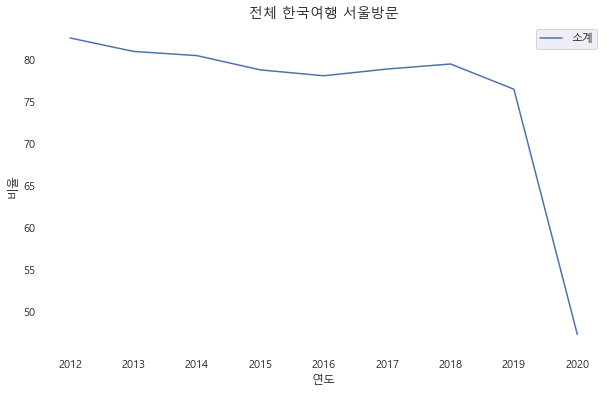

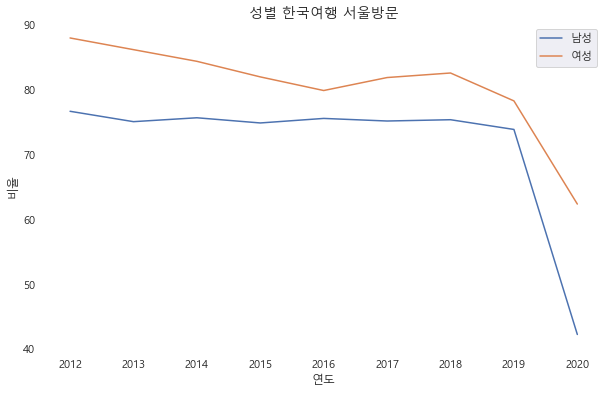

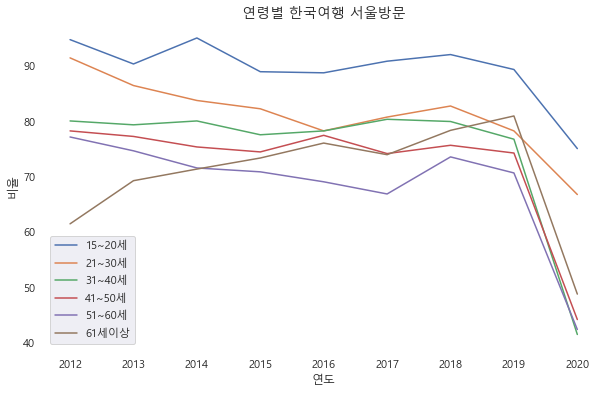

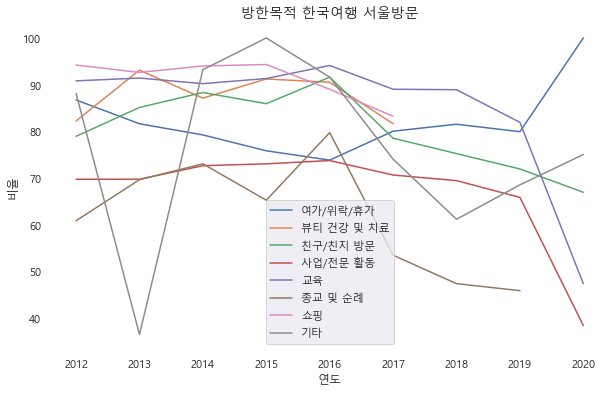

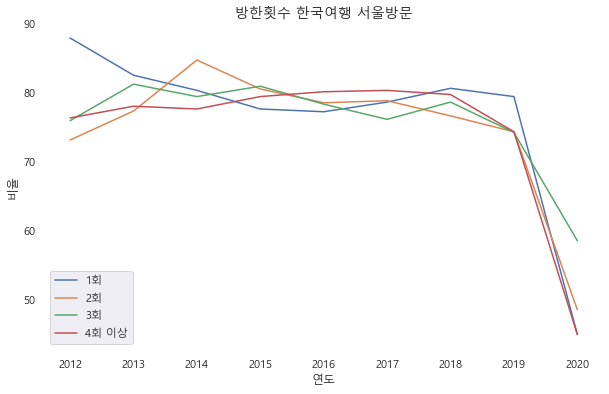

In [24]:
file.head(30)
file = file[file['분류별(1)'] == '한국여행중 서울방문']
sorts = file['구분별(1)'].unique()

for sort in sorts:
    idx = [idx for idx in file.index if file.loc[idx, '구분별(1)'] == sort]
    _df = file.loc[idx, :]
    _df.reset_index(drop=True, inplace=True)
    
    fig, ax = plt.subplots(figsize = (10, 6))
    ax.set_facecolor('white')
    
    sorts_2 = _df['구분별(2)'].unique()
    
    for i, s in enumerate(sorts_2):
        ax = sns.lineplot(x =year, y =_df.loc[i, year], label = s)
    
    plt.xlabel('연도')
    plt.ylabel('비율')
    plt.title(f'{sort} 한국여행 서울방문', fontsize = 14)

## 해외여행경험및횟수_시도__2011_2021.xlsx
**설문조사 가중치 적용해야 함.**

In [25]:
file = pd.read_excel(path + '해외여행경험및횟수_시도__2011_2021.xlsx')
# 해외여행 경험 및 횟수 : 지난 1년 동안 해외에 다녀온 사람의 비율 및 횟수

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [26]:
file
72.1 + 12.9 + 18.7 + 6.9 

110.60000000000001

In [27]:
file
idx = [idx for idx in file.index if file.loc[idx, '특성별(1)'] == '전체']

In [28]:
file.loc[idx, :]
year = file.시점.unique()
year

array([2011, 2013, 2015, 2017, 2019, 2021], dtype=int64)

In [29]:
seoul_idx = [idx for idx in file.index if file.loc[idx, '행정구역별(1)'] == '서울특별시']

In [30]:
seoul = file.loc[seoul_idx, :]
seoul.reset_index(drop=True, inplace=True)
seoul = seoul.astype({'시점' : str})

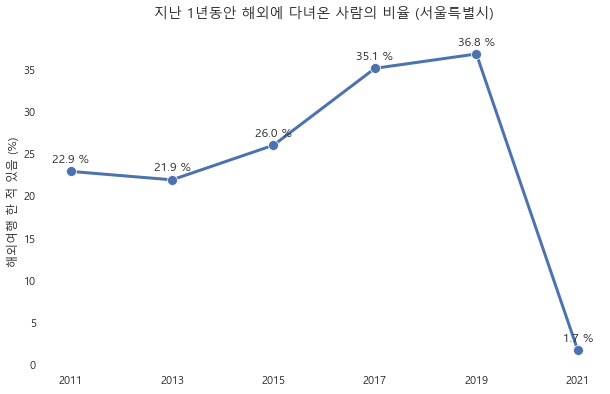

In [31]:
# 서울사람들 중 지난 1년동안 해외에 다녀온 사람의 비율
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('white')

year = list(seoul.시점.unique())

ax = sns.lineplot(year, seoul['해외여행 한 적 있음 (%)'], linewidth = 3, marker='o', markersize = 10)

for i, v in enumerate(seoul['해외여행 한 적 있음 (%)']):
    plt.text(i, v + 1, str(v) + ' %', ha = 'center', fontsize = 12)
    
plt.title('지난 1년동안 해외에 다녀온 사람의 비율 (서울특별시)\n', fontsize = 14)
plt.show()

In [26]:
seoul
df = seoul.iloc[:, [3,7,9,11,13]]

In [27]:
col_num = [7,9,11,13]
new_df = pd.DataFrame()
for num in col_num:
    _df = seoul.iloc[:, [3, num]]
    _df['구분'] = seoul.columns[num]
    _df.columns = ['시점', 'value', '구분']
    new_df = pd.concat([new_df, _df], axis=0)

C:\Users\user\AppData\Local\Temp\ipykernel_2136\3445625537.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['구분'] = seoul.columns[num]
C:\Users\user\AppData\Local\Temp\ipykernel_2136\3445625537.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['구분'] = seoul.columns[num]
C:\Users\user\AppData\Local\Temp\ipykernel_2136\3445625537.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [28]:
new_df['구분'] = new_df['구분'].apply(lambda x:x[1:-3])

[0 1 2 3 4 5]


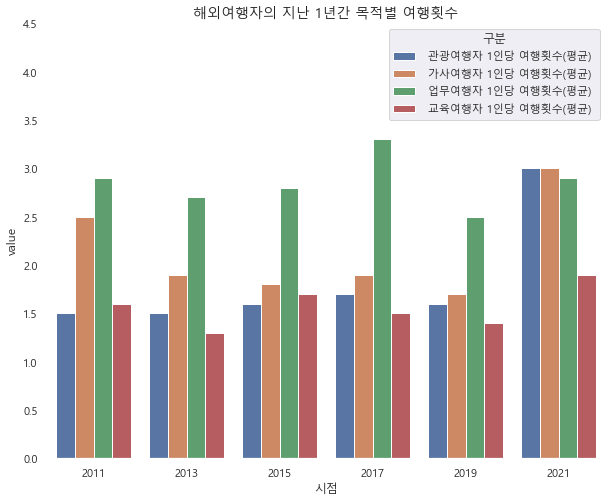

In [29]:
# new_df
fig, ax = plt.subplots(figsize = (10, 8))
ax.set_facecolor('white')

ax = sns.barplot(x = '시점', y='value', hue = '구분', data = new_df)

a = ax.get_xticks()
print(a)
ax.set_ylim(0.0, 4.5)
plt.title('해외여행자의 지난 1년간 목적별 여행횟수', fontsize = 14)
plt.show()

In [30]:
file

,행정구역별(1),특성별(1),특성별(2),시점,계 (%),해외여행 한 적 있음 (%),- 관광 (%),· 관광여행자 1인당 여행횟수(평균) (회),- 가족 및 친지 방문 (%),· 가사여행자 1인당 여행횟수(평균) (회),- 업무 (%),· 업무여행자 1인당 여행횟수(평균) (회),- 교육 (%),· 교육여행자 1인당 여행횟수(평균) (회)
0,전국,전체,계,2011,100.0,15.9,72.1,1.4,12.9,2.2,18.7,2.7,6.9,1.4
1,전국,전체,계,2013,100.0,17.2,77.1,1.5,10.8,2.1,17.3,2.6,5.2,1.3
2,전국,전체,계,2015,100.0,19.7,79.8,1.5,9.8,1.8,16.1,2.7,4.2,1.5
3,전국,전체,계,2017,100.0,26.5,88.1,1.5,6.4,1.7,10.9,2.9,2.9,1.4
4,전국,전체,계,2019,100.0,30.4,89.8,1.6,6.6,1.9,9.4,2.7,2.7,1.7
5,전국,전체,계,2021,100.0,1.1,43.0,2.1,33.0,2.4,34.1,2.4,13.9,2.0
6,전국,성별,남자,2011,100.0,15.9,63.9,1.4,10.4,2.2,30.2,2.7,6.8,1.4
7,전국,성별,남자,2013,100.0,17.4,70.2,1.5,9.6,2.2,26.5,2.7,5.4,1.4
8,전국,성별,남자,2015,100.0,19.6,73.2,1.5,8.8,1.7,25.6,2.7,4.6,1.6
9,전국,성별,남자,2017,100.0,24.8,83.9,1.5,5.7,1.7,18.3,2.9,2.8,1.5


## 주요관광지점+입장객(박물관+및+전시관+등)_2013_2021.xlsx

In [32]:
file = pd.read_excel(path + '주요관광지점+입장객(박물관+및+전시관+등)_2013_2021.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [33]:
file
# len(file)

,구분별(1),구분별(2),2013,2014,2015,2016,2017,2018,2019,2020,2021
0,국립중앙박물관,일평균,8360.0,9673.0,8440.0,9279.0,9525.0,9053.0,9189.0,4749.0,3488.0
1,국립중앙박물관,합계,3051441.0,3530781.0,3080577.0,3396259.0,3476606.0,3304453.0,3354089.0,1738008.0,1273173.0
2,국립중앙박물관,내국인,2904439.0,3409679.0,2951132.0,3212410.0,3365004.0,3178236.0,3215625.0,1713410.0,1259054.0
3,국립중앙박물관,외국인,147002.0,121102.0,129445.0,183849.0,111602.0,126217.0,138464.0,24598.0,14119.0
4,서대문형무소역사관,일평균,1636.0,1776.0,1657.0,1808.0,1912.0,1858.0,2750.0,155.0,247.0
5,서대문형무소역사관,합계,597311.0,648234.0,604721.0,661836.0,697980.0,678033.0,1003689.0,56563.0,90316.0
6,서대문형무소역사관,내국인,546496.0,584941.0,546316.0,602750.0,643931.0,665698.0,968375.0,54035.0,88865.0
7,서대문형무소역사관,외국인,50815.0,63293.0,58405.0,59086.0,54049.0,12335.0,35314.0,2528.0,1451.0
8,서울시립미술관 본관,일평균,4324.0,1953.0,2052.0,2964.0,3795.0,3751.0,5064.0,898.0,1746.0
9,서울시립미술관 본관,합계,1578283.0,712826.0,749068.0,1084694.0,1385209.0,1369149.0,1848203.0,328569.0,637417.0


In [34]:
file['구분별(1)'].unique()

array(['국립중앙박물관', '서대문형무소역사관', '서울시립미술관 본관', '남산한옥마을', '서울대공원'],
      dtype=object)

In [35]:
# file
# sorts = file['구분별(1)'].unique()

# test_df = file.iloc[:4, :]
# fig, ax = plt.subplots(figsize = (12, 8))
# year = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

# x = np.arange(len(year))
# bar_width = 0.15

# ax = plt.bar(x+bar_width*0, test_df.iloc[0, 2:], bar_width)
# ax = plt.bar(x+bar_width, test_df.iloc[1, 2:], bar_width)
# ax = plt.bar(x+bar_width*2, test_df.iloc[2, 2:], bar_width)
# print(x+bar_width)

C:\Users\user\AppData\Local\Temp\ipykernel_16192\841127759.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_yticklabels(['{:,.0f}'.format(x) for x in w])
C:\Users\user\AppData\Local\Temp\ipykernel_16192\841127759.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_yticklabels(['{:,.0f}'.format(x) for x in w])
C:\Users\user\AppData\Local\Temp\ipykernel_16192\841127759.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_yticklabels(['{:,.0f}'.format(x) for x in w])
C:\Users\user\AppData\Local\Temp\ipykernel_16192\841127759.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_yticklabels(['{:,.0f}'.format(x) for x in w])


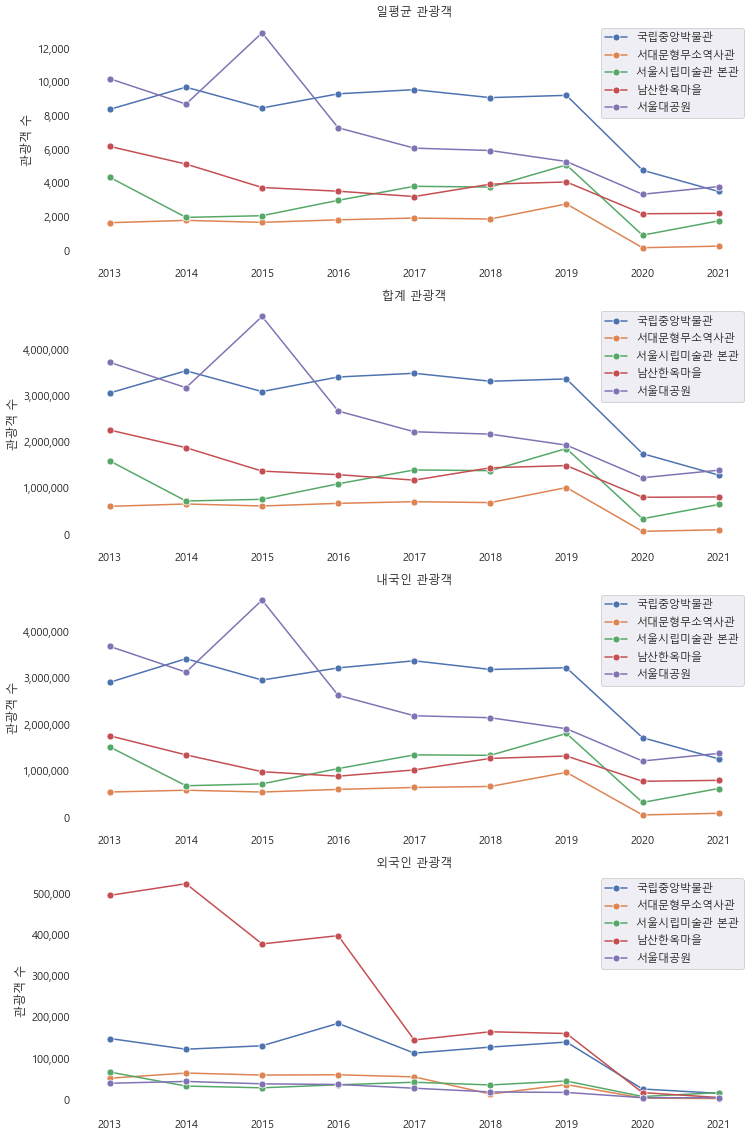

In [38]:
import matplotlib.gridspec as grid_spec

sorts = file['구분별(2)'].unique()
year = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

gs = grid_spec.GridSpec(4,1)
fig = plt.figure(figsize=(12, 20))

for i, sort in enumerate(sorts):
    
    _ax = fig.add_subplot(gs[i:i+1,:])
    _ax.set_facecolor('white')
    _df = file[file['구분별(2)'] == sort]
    
    for num in range(len(_df)):
        _ax = sns.lineplot(x =year, y=_df.iloc[num, 2:], marker = 'o', linewidth = 1.5, markersize = 7, label = _df.iloc[num, 0])
        
    w = _ax.get_yticks()
    _ax.set_yticklabels(['{:,.0f}'.format(x) for x in w])
    _ax.set_ylabel('관광객 수')
        
    _ax.set_title(f'{sort} 관광객')

In [36]:
gs

GridSpec(4, 1)

## 주요관광지점+입장객(4대궁+및+종묘)_2011_2021.xlsx

In [39]:
file = pd.read_excel(path + '주요관광지점+입장객(4대궁+및+종묘)_2011_2021.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [40]:
file.columns

Index(['구분별(1)', '2011', '2011.1', '2011.2', '2011.3', '2012', '2012.1',
       '2012.2', '2012.3', '2013', '2013.1', '2013.2', '2013.3', '2014',
       '2014.1', '2014.2', '2014.3', '2015', '2015.1', '2015.2', '2015.3',
       '2016', '2016.1', '2016.2', '2016.3', '2017', '2017.1', '2017.2',
       '2017.3', '2018', '2018.1', '2018.2', '2018.3', '2019', '2019.1',
       '2019.2', '2019.3', '2020', '2020.1', '2020.2', '2020.3', '2021',
       '2021.1', '2021.2', '2021.3'],
      dtype='object')

In [41]:
file
cols = [col for col in file.columns if (file.loc[0, col] == '이용자수') | (file.loc[0, col] == '합계')]

In [42]:
total_cnt = file.loc[:, ['구분별(1)'] + cols]
total_cnt.drop(0, axis = 0 ,inplace =True)
total_cnt= total_cnt.replace({'-' : np.nan})
# total_cnt = total_cnt.astype(int)

In [43]:
total_cnt.set_index('구분별(1)', inplace=True)

In [44]:
total_cnt.columns = [str(col) for col in list(np.arange(2011, 2022, 1))]

In [45]:
total_cnt

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
구분별(1),,,,,,,,,,,
경복궁,3799804.0,4522171.0,4400320.0,5575704.0,5061533.0,6020118.0,4504992.0,4447571.0,5346746.0,1019097.0,1085188.0
창덕궁,1413636.0,1458968.0,1574701.0,1610233.0,1631997.0,1820036.0,1803034.0,1664692.0,1785058.0,472875.0,643549.0
창경궁,519423.0,598205.0,637394.0,739967.0,849089.0,895137.0,835972.0,767446.0,874324.0,391315.0,557433.0
덕수궁,1183977.0,984446.0,1180217.0,1333888.0,1286981.0,1546126.0,1849804.0,1716334.0,2413596.0,1027432.0,1548926.0
종묘,367439.0,416967.0,333401.0,309887.0,276733.0,329403.0,415196.0,477628.0,450398.0,146377.0,215263.0
어린이대공원,13479871.0,11456778.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
서울대공원,4335514.0,3534640.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\user\AppData\Local\Temp\ipykernel_16192\882213600.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(x) for x in w])


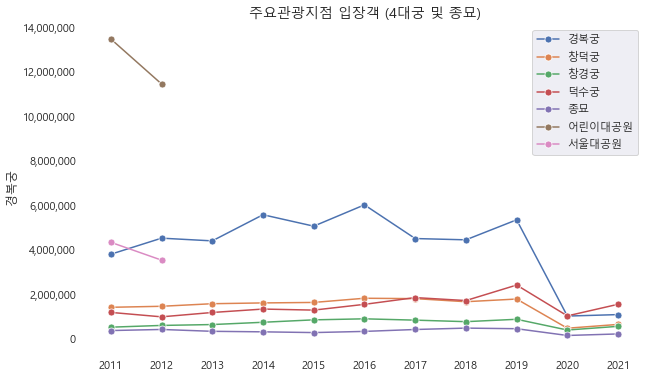

In [46]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('white')

for index in total_cnt.index:
    ax = sns.lineplot( x= total_cnt.columns, y = total_cnt.loc[index, :], marker='o', markersize= 7, label= index)
#     for i, v in enumerate(total_cnt.loc[index, :]):
#         if v != np.nan:
#             plt.text(i, v, format(int(v), ','), ha='center')
    
w = ax.get_yticks()
ax.set_yticklabels(['{:,.0f}'.format(x) for x in w])

plt.title('주요관광지점 입장객 (4대궁 및 종묘)', fontsize = 14)
plt.legend()
plt.show()


## 방한외래관광객,국민해외관광객,관광수입(1975-2021).xlsx

In [59]:
file = pd.read_excel(path + '방한외래관광객,국민해외관광객,관광수입(1975-2021).xlsx')
# (관광수입, 관광지출, 관광수지) 2021년 수치는 잠정치임. 따라서 2011-2020으로 확인함
# 국민 해외관광객의 경우 승무원 수를 포함함.
# file

In [47]:
import openpyxl

In [48]:
wb=openpyxl.load_workbook(path+'방한외래관광객,국민해외관광객,관광수입(2010-2021)_수정.xlsx' )

In [49]:
sheetnames = wb.sheetnames
sheetnames

['방한_외래관광객', '국민_해외관광객', '관광수입', '관광지출', '관광수지']

In [50]:
file = pd.read_excel(path + '방한외래관광객,국민해외관광객,관광수입(2010-2021)_수정.xlsx', sheet_name=sheetnames[0])

In [51]:
file # 방한_외래관광객
file = file.astype({"연  도" : str})
file

,연 도,계(명),성장률 Change(%),1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2010,8797658,12.537523,569453,638911,769894,730265,729450,718440,754672,833693,764693,872550,738271,677366
1,2011,9794796,11.334130,586152,667089,781286,754458,743464,795850,881809,977296,906813,988320,869876,842383
2,2012,11140028,13.734150,753793,810967,916357,967593,942602,946333,1009225,1103311,986961,1025705,842189,834992
3,2013,12175550,9.295506,753655,815037,1010809,972164,919355,1059082,1205152,1358909,1156913,1087974,907901,928599
4,2014,14201516,16.639626,842671,886026,1132155,1251374,1239606,1273627,1354753,1454078,1245777,1317482,1117398,1086569
5,2015,13231651,-6.829306,917054,1050706,1238144,1384567,1334212,750925,629737,1069314,1206764,1383704,1150074,1116450
6,2016,17241823,30.307420,1077431,1126250,1389399,1469674,1492680,1554413,1703495,1664303,1523928,1587797,1309055,1343398
7,2017,13335758,-22.654594,1220695,1252080,1233640,1075899,977889,991802,1008671,1103506,1078653,1165638,1093217,1134068
8,2018,15346879,15.080665,956036,1045415,1366100,1331709,1238021,1282093,1254833,1391727,1278604,1527832,1350390,1324119
9,2019,17502756,14.047658,1104803,1201802,1535641,1635066,1485684,1476218,1448067,1586299,1459664,1656195,1456429,1456888


C:\Users\user\AppData\Local\Temp\ipykernel_16192\3045260247.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(x) for x in w])


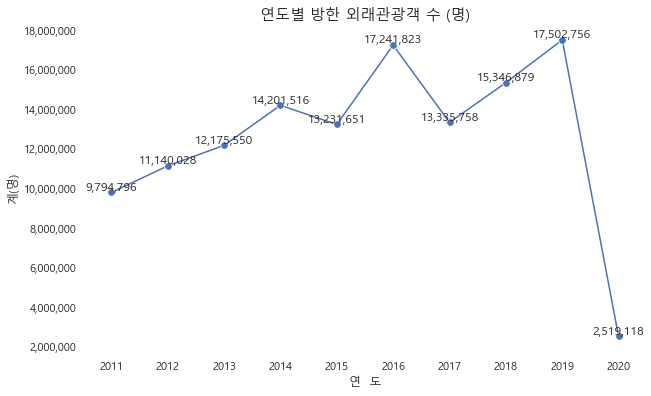

In [52]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('white')

ax = sns.lineplot(file.iloc[1:11, 0], file.iloc[1:11, 1], linewidth = 1.5, marker = 'o', markersize = 7.5)
for i, v in enumerate(file.iloc[1:11, 1]):
    plt.text(i, v+90000, format(v, ','), ha='center')
w = ax.get_yticks()
ax.set_yticklabels(['{:,.0f}'.format(x) for x in w])

plt.title('연도별 방한 외래관광객 수 (명)',fontsize = 15)
plt.show()
# w = ax.get_yticks()

In [53]:
file = pd.read_excel(path + '방한외래관광객,국민해외관광객,관광수입(2010-2021)_수정.xlsx', sheet_name=sheetnames[1])
file = file.astype({"연  도" : str}) 
file # 국민 해외 관광객, 승무원 포함

,연 도,계(명),성장률 Change(%),1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2010,12488364,31.538003,1118261,908103,950185,935904,1023815,997597,1223723,1235742,1013123,1055581,1004902,1021428
1,2011,12693733,1.644483,1268007,1091628,868694,867487,1014409,1053658,1241629,1247222,1013507,1032589,974255,1020648
2,2012,13736976,8.218567,1200782,1150334,1018952,1018645,1096950,1109273,1305418,1334651,1059709,1154742,1117550,1169970
3,2013,14846485,8.076807,1425900,1184807,1113946,1097420,1185405,1221491,1417422,1407186,1195238,1239143,1154064,1204463
4,2014,16080684,8.313072,1468903,1312683,1150959,1179885,1223003,1270439,1454795,1547193,1321293,1432100,1288754,1430677
5,2015,19310430,20.084631,1834538,1445609,1416683,1495460,1579265,1373551,1675332,1835249,1511657,1735308,1626063,1781715
6,2016,22383190,15.912437,2112337,1876928,1569162,1636597,1656728,1778317,2086068,2064241,1904524,1865552,1825701,2007035
7,2017,26496447,18.376545,2343048,2231269,1940542,2003943,2003834,2098126,2389447,2385301,2236500,2231748,2227747,2404942
8,2018,28695983,8.301249,2866780,2311009,2252565,2230200,2331565,2323986,2495297,2519860,2225756,2347876,2295810,2495279
9,2019,28714247,0.063647,2912331,2617946,2334153,2246417,2401204,2495798,2642585,2427634,2049830,2153847,2090192,2342310


C:\Users\user\AppData\Local\Temp\ipykernel_16192\613333127.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(x) for x in w])


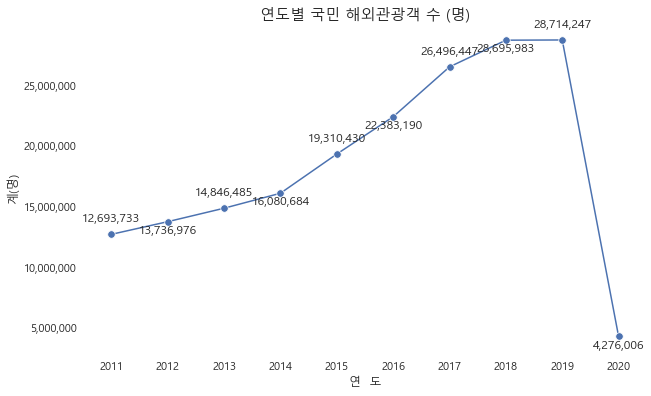

In [57]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('white')

ax = sns.lineplot(file.iloc[1:11, 0], file.iloc[1:11, 1], linewidth = 1.5, marker = 'o', markersize = 7.5)
for i, v in enumerate(file.iloc[1:11, 1]):
    if i%2 == 0:
        plt.text(i, v+1000000, format(v, ','), ha = 'center')
    else:
        plt.text(i, v-1000000, format(v, ','), ha = 'center')
        
w = ax.get_yticks()
ax.set_yticklabels(['{:,.0f}'.format(x) for x in w])

plt.title('연도별 국민 해외관광객 수 (명)',fontsize = 15)
plt.show()

In [61]:
file = pd.read_excel(path + '방한외래관광객,국민해외관광객,관광수입(2010-2021)_수정.xlsx', sheet_name=sheetnames[2])
print(sheetnames[2])
file = file.astype({"연  도         Year" : str}) 
file # 관광수입
file.drop([0, 11], axis=0, inplace=True)
file

관광수입


,연 도 Year,"계\nTotal(US$1,000)",성장률(%),1인당평균\n소비액(US$),1월\n Jan.,2월 \n Feb.,3월 \n Mar.,4월\n Apr.,5월\nMay,6월\n Jun.,7월 \nJul.,8월 \n Aug.,9월 \n Sep.,10월 \nOct.,11월\n Nov.,12월\n Dec.
1,2011,12233900,19.642263,1249.0,680200,753400,952000.0,786600,926800,895300,948100,1235800,1358200,1220300,1257100,1220100
2,2012,13201100,7.905901,1185.0,993300,1022300,1165200.0,1288600,1371400,1126200,1090200,1052600,1028000,1137100,975000,951200
3,2013,14288400,8.236435,1173.5,1058200,975100,1193200.0,1245100,1177400,1260500,1250000,1147300,1374100,1330300,1098300,1178900
4,2014,17335900,21.328490,1220.7,1021800,1091200,1304700.0,1356400,1342600,1369900,1557300,1549000,1703700,1738000,1702100,1599200
5,2015,14675800,-15.344459,1109.1,1230500,1221300,1561500.0,1499600,1485500,938000,783100,1099800,1171400,1255400,1180700,1249000
6,2016,16753900,14.160046,971.7,1281600,1374500,1471100.0,1364300,1669400,1464500,1213300,1464100,1274500,1483900,1370500,1322200
7,2017,13263900,-20.830971,994.6,1176700,1272600,1125600.0,988400,988100,1008700,956000,1375500,1216400,1045000,1081200,1029700
8,2018,18461800,39.188323,1203.0,1241100,1276900,1590700.0,1713400,1615300,1669600,1487400,1562000,1521900,1850400,1401900,1531200
9,2019,20744900,12.366616,1185.0,1446000,1450000,2062200.0,2014000,1850700,1519300,1695700,1767600,1624700,1745300,1733600,1835800
10,2020,10181100,-50.922395,4042.0,1642800,1442000,816900.0,536300,583500,594800,732600,783300,788800,752200,762800,745100


In [62]:
print(file.columns)

Index(['연  도         Year', '계\nTotal(US$1,000)', '성장률(%)', '1인당평균\n소비액(US$)',
       '1월\n Jan.', '2월    \n Feb.', '3월    \n Mar.', '4월\n Apr.', '5월\nMay',
       '6월\n Jun.', '7월     \nJul.', '8월    \n Aug.', '9월    \n Sep.',
       '10월   \nOct.', '11월\n Nov.', '12월\n Dec.'],
      dtype='object')


C:\Users\user\AppData\Local\Temp\ipykernel_16192\3647859099.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(x) for x in w])


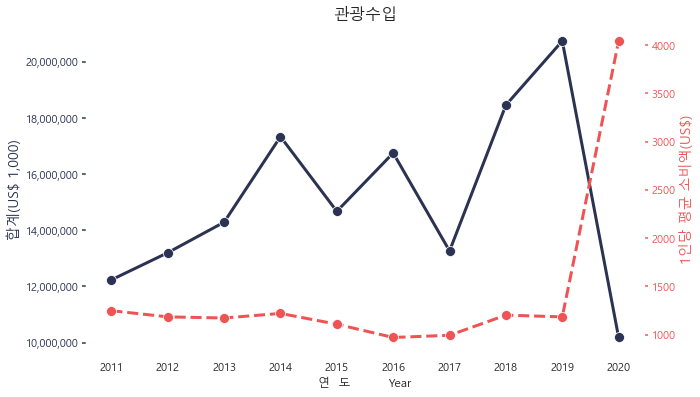

In [64]:
fig, ax = plt.subplots(figsize = (10,6))

tkw = dict(size=4, width=1.5)

ax.set_facecolor('white')
ax.grid(None)
ax = sns.lineplot(x = file.iloc[:, 0], y= file.iloc[:, 1] ,linewidth = 3, marker = 'o', markersize = 10, color = '#2b3252')

w = ax.get_yticks()
ax.set_yticklabels(['{:,.0f}'.format(x) for x in w])
ax.set_ylabel('합계(US$ 1,000)', fontsize = 14)
ax.yaxis.label.set_color('#2b3252')
ax.tick_params(axis='y', colors='#2b3252', **tkw)



ax2 = ax.twinx()
ax2.set_facecolor('white')
ax2.grid(None)
ax2 = sns.lineplot(x = file.iloc[:, 0], y= file.iloc[:, 3] ,linewidth = 3, marker = 'o', markersize = 10, color = '#ef5455')
ax2.lines[0].set_linestyle('--')
ax2.set_ylabel('1인당 평균 소비액(US$)', fontsize = 14)
ax2.yaxis.label.set_color('#ef5455')
ax2.tick_params(axis='y', colors='#ef5455', **tkw)

plt.title('관광수입', fontsize = 16)
plt.show()

In [65]:
file_spend = pd.read_excel(path + '방한외래관광객,국민해외관광객,관광수입(2010-2021)_수정.xlsx', sheet_name=sheetnames[3])
print(sheetnames[3])
file_spend = file_spend.astype({"연  도         Year" : str}) 
file_spend # 관광지출
file_spend.drop([0, 11], axis=0, inplace=True)
file_spend

관광지출


,연 도 Year,"계\nTotal(US$1,000)",성장률(%),1인당평균\n소비액(US$),1월\n Jan.,2월 \n Feb.,3월 \n Mar.,4월\n Apr.,5월\nMay,6월\n Jun.,7월 \nJul.,8월 \n Aug.,9월 \n Sep.,10월 \nOct.,11월\n Nov.,12월\n Dec.
1,2011,15530800,8.776624,1223.5,1475500,1140300,1179800.0,1215300,1315700,1404200,1519200,1429200,1233700,1169100,1185100,1263700
2,2012,16494500,6.205089,1200.7,1374800,1334100,1257200.0,1210500,1286900,1372300,1520900,1473800,1333500,1443300,1421900,1465300
3,2013,17340700,5.130195,1168.0,1533900,1259700,1260000.0,1321100,1408100,1330200,1649300,1543400,1513100,1528000,1419200,1574700
4,2014,19469900,12.278628,1210.8,1610900,1408100,1393800.0,1650000,1622600,1661200,1780800,1800400,1645000,1697100,1453600,1746400
5,2015,21528000,10.570676,1114.8,1859600,1541400,1702400.0,1855700,1718400,1789100,1942100,1777500,1685700,1959800,1764000,1932300
6,2016,23688600,10.036232,1058.3,1827800,1703200,1849100.0,1814400,1785300,2032800,2260500,2359600,2181500,1853000,1950900,2070500
7,2017,27959800,18.030614,1055.2,2258900,2265600,2252700.0,2098200,2305400,2231200,2483600,2387500,2221800,2600700,2407700,2446500
8,2018,31527900,12.761536,1099.0,3141600,2561400,2729300.0,2499000,2688900,2544500,2587400,2690800,2426900,2502600,2523800,2631700
9,2019,29260500,-7.191725,1019.0,2765900,2231900,2194700.0,2332000,2516900,2484500,2631400,2456800,2250500,2344400,2456400,2595100
10,2020,13356400,-54.353480,3124.0,2631200,1402600,1032900.0,735800,658000,822100,884400,942300,980700,1045000,1125000,1096400


C:\Users\user\AppData\Local\Temp\ipykernel_16192\2312623556.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(x) for x in w])


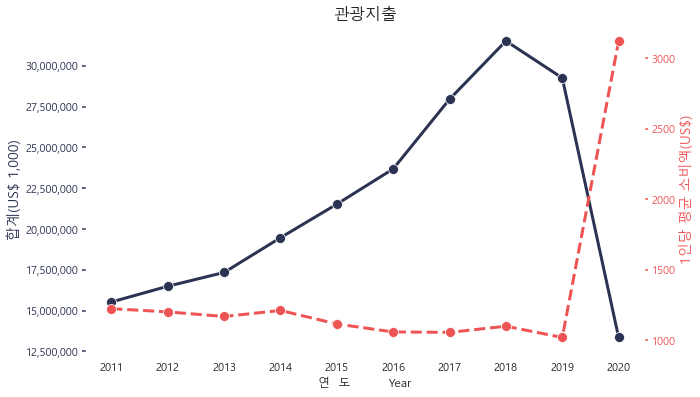

In [66]:
fig, ax = plt.subplots(figsize = (10,6))

tkw = dict(size=4, width=1.5)

ax.set_facecolor('white')
ax.grid(None)
ax = sns.lineplot(x = file_spend.iloc[:, 0], y= file_spend.iloc[:, 1] ,linewidth = 3, marker = 'o', markersize = 10, color = '#2b3252')

w = ax.get_yticks()
ax.set_yticklabels(['{:,.0f}'.format(x) for x in w])
ax.set_ylabel('합계(US$ 1,000)', fontsize = 14)
ax.yaxis.label.set_color('#2b3252')
ax.tick_params(axis='y', colors='#2b3252', **tkw)



ax2 = ax.twinx()
ax2.set_facecolor('white')
ax2.grid(None)
ax2 = sns.lineplot(x = file_spend.iloc[:, 0], y= file_spend.iloc[:, 3] ,linewidth = 3, marker = 'o', markersize = 10, color = '#ef5455')
# for i, v in enumerate(file_spend.iloc[:, 3]):
#     plt.text(i,v,format(int(v),','), ha ='center')
ax2.lines[0].set_linestyle('--')
ax2.set_ylabel('1인당 평균 소비액(US$)', fontsize = 14)
ax2.yaxis.label.set_color('#ef5455')
ax2.tick_params(axis='y', colors='#ef5455', **tkw)

plt.title('관광지출', fontsize = 16)
plt.show()